# **taking the plotting dataframe created in 1.2 and plotting all four early/late change/counts scatter plots together** 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
df = pd.read_csv("data/Data_dataframes/final_plotting_01_2x_coverage_2021_04_21.csv")

In [5]:
CpG_binary = []
for x in df.triplet: 
    if "CG" in x: 
        CpG_binary.append("CpG")
    else: 
        CpG_binary.append("Non CpG")
df['CpG_status'] = CpG_binary

In [6]:
df_CpG = df[df.CpG_status == "CpG"]
df_nonCpG = df[df.CpG_status == "Non CpG"]

In [7]:
df_CpG

,Unnamed: 0,triplet,mut,mut_log10,change_01_mean,change_early_stder,change_2_mean,change_2_stder,countsChosen_01_mean,countsChosen_01_stder,countsInto_01_mean,countsInto_01_stder,countsChosen_2_mean,countsChosen_2_stder,countsInto_2_mean,countsInto_2_stder,CpG_status
1,GCG,GCG,0.000293,-3.533051,-0.671613,0.001847,-0.935979,0.000920,551.6,1.435409,82.6,0.637495,2731.5,4.436271,1965.0,4.531666,CpG
2,CGG,CGG,0.000284,-3.546064,-0.641476,0.001077,-0.938726,0.000692,577.3,1.951948,96.5,0.576628,2744.0,4.376985,2220.9,4.658852,CpG
15,CCG,CCG,0.000285,-3.544658,-0.641567,0.001258,-0.937014,0.000542,560.1,1.645266,100.6,0.569561,2788.1,4.015582,2220.4,3.092960,CpG
37,CGC,CGC,0.000292,-3.534938,-0.668965,0.000978,-0.940796,0.000724,572.9,1.588993,74.9,0.787972,2685.5,4.087603,1914.8,4.390171,CpG
38,CGT,CGT,0.000359,-3.444694,-0.612106,0.002070,-0.867497,0.000805,734.0,2.627927,161.7,1.200042,5842.7,7.339353,5343.1,5.654458,CpG
40,CGA,CGA,0.000262,-3.580975,-0.607391,0.001511,-0.891677,0.000568,557.4,1.675231,75.1,0.995440,3535.7,8.063876,2631.2,6.087660,CpG
54,ACG,ACG,0.000362,-3.441086,-0.622075,0.001234,-0.871105,0.000805,731.8,2.983555,151.7,1.151564,5733.8,8.029795,5039.9,9.976016,CpG
61,TCG,TCG,0.000246,-3.608863,-0.593906,0.001540,-0.894830,0.000757,516.8,1.546480,64.6,0.652993,3331.4,5.897661,2337.8,3.628994,CpG


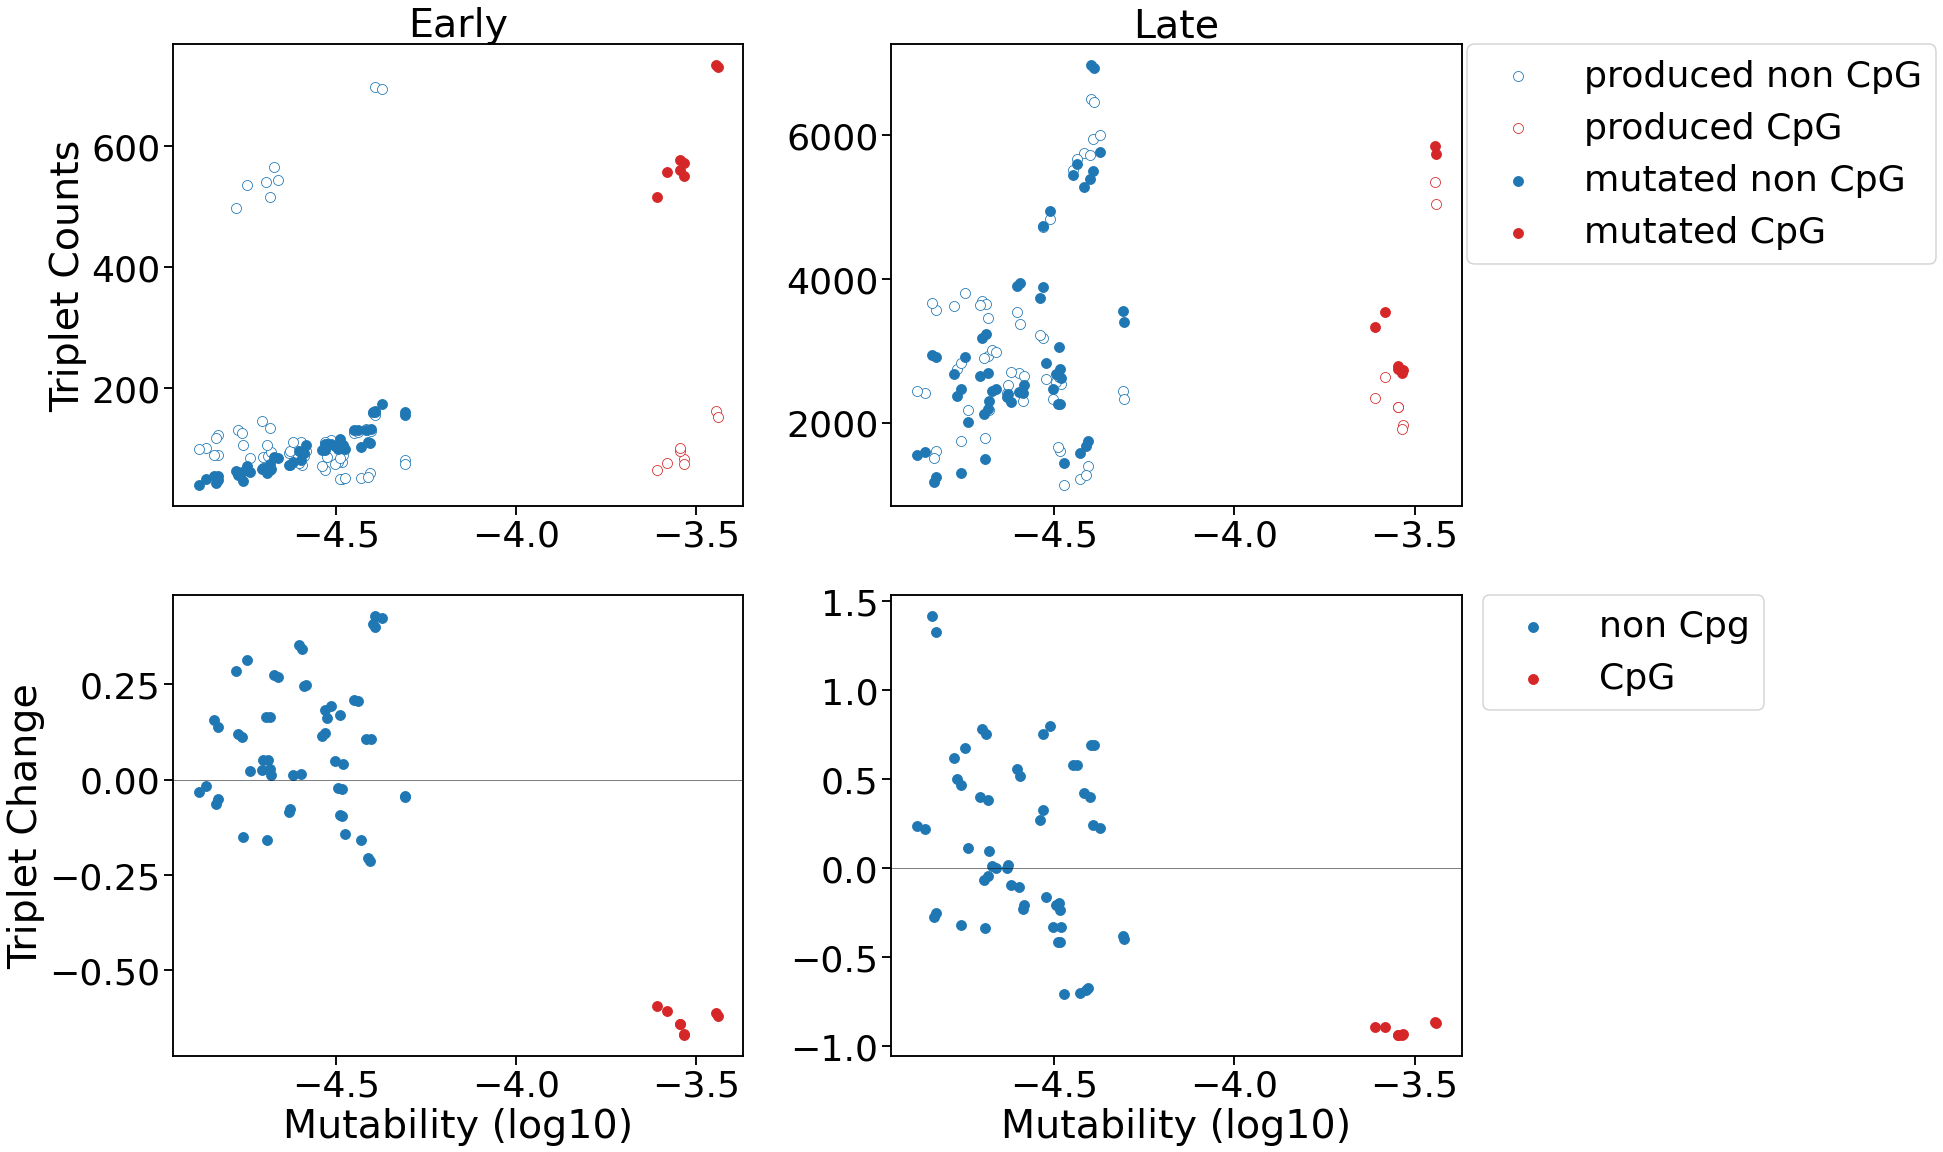

In [8]:
plt.figure(figsize=(28,17))

sns.color_palette("rocket", as_cmap = True)
sns.set_context("talk", font_scale=2.2)

plt.subplot(2,2,1)
p1 = sns.scatterplot(x=df_nonCpG.mut_log10, y=df_nonCpG.countsInto_01_mean, color = "white", edgecolor = "tab:blue",legend = False,s=100)#style page https://seaborn.pydata.org/generated/seaborn.scatterplot.html
p1 = sns.scatterplot(x=df_nonCpG.mut_log10, y=df_nonCpG.countsChosen_01_mean, color = "tab:blue", edgecolor = "tab:blue", legend = False ,s=100)
p1 = sns.scatterplot(x=df_CpG.mut_log10, y=df_CpG.countsInto_01_mean, color = "white", edgecolor = "tab:red",legend = False,s=100)#style page https://seaborn.pydata.org/generated/seaborn.scatterplot.html
p1 = sns.scatterplot(x=df_CpG.mut_log10, y=df_CpG.countsChosen_01_mean, color = "tab:red", edgecolor = "tab:red", legend = False ,s=100)
p1.set(title = "Early")
p1.set(ylabel = "Triplet Counts")
p1.set(xlabel=None)

plt.subplot(2,2,2)
p2 = sns.scatterplot(x=df_nonCpG.mut_log10, y=df_nonCpG.countsInto_2_mean, color = "white", edgecolor = "tab:blue",label="produced non CpG",s=100)
p2 = sns.scatterplot(x=df_CpG.mut_log10, y=df_CpG.countsInto_2_mean, color = "white", edgecolor = "tab:red",label="produced CpG",s=100)
p2 = sns.scatterplot(x=df_nonCpG.mut_log10, y=df_nonCpG.countsChosen_2_mean, color = "tab:blue", edgecolor = "tab:blue",label="mutated non CpG",s=100)
p2 = sns.scatterplot(x=df_CpG.mut_log10, y=df_CpG.countsChosen_2_mean, color = "tab:red", edgecolor = "tab:red", label="mutated CpG",s=100)
p2.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)# lgened location https://datavizpyr.com/how-to-place-legend-outside-the-plot-with-seaborn-in-python/
p2.set(xlabel=None)
p2.set(ylabel=None)
p2.set(title = "Late")

plt.subplot(2,2,3)
p3 = sns.scatterplot(x=df_nonCpG.mut_log10, y=df_nonCpG.change_01_mean, color = "tab:blue", edgecolor = "tab:blue", legend = False,s=100)
p3 = sns.scatterplot(x=df_CpG.mut_log10, y=df_CpG.change_01_mean, color = "tab:red", edgecolor = "tab:red", legend = False,s=100)
# p3 = sns.lineplot(x=[min(list(df.mut_log10)), max(list(df.mut_log10))], y=[0,0])
p3.axhline(0, color = "black", linewidth = 0.5)
p3.set(xlabel = "Mutability (log10)", ylabel = "Triplet Change")

plt.subplot(2,2,4)
# p4 = sns.scatterplot(x=df.mut_log10, y=df.change_2_mean, color = CpG_binary)
p4 = sns.scatterplot(x=df_nonCpG.mut_log10, y=df_nonCpG.change_2_mean, color = "tab:blue", edgecolor = "tab:blue",label="non Cpg",s=100)
p4 = sns.scatterplot(x=df_CpG.mut_log10, y=df_CpG.change_2_mean, color = "tab:red", edgecolor = "tab:red",label="CpG",s=100)
p4.legend(bbox_to_anchor=(1.53, 1),borderaxespad=0)
p4.set(xlabel = "Mutability (log10)")
p4.axhline(0, color = "black", linewidth = 0.5)
p4.set(ylabel=None)

# plt.show()
timestamp = datetime.now().strftime("%Y/%m/%d_%H").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("plots/Scatter_{t}_{l}Mbp_{p}propmuts_accurateINTO_genomeModel_log_CpGlabel_color_redBlue.pdf".format(p = 2, l = 0.1, t = timestamp),bbox_inches="tight")

In [38]:
df_nonCpG[df_nonCpG.countsInto_01_mean >= 400]

,Unnamed: 0,triplet,mut,mut_log10,change_01_mean,change_early_stder,change_2_mean,change_2_stder,countsChosen_01_mean,countsChosen_01_stder,countsInto_01_mean,countsInto_01_stder,countsChosen_2_mean,countsChosen_2_stder,countsInto_2_mean,countsInto_2_stder,CpG_status
5,TTG,TTG,0.000017,-4.777110,0.283836,0.001249,0.615800,0.004207,63.1,0.657951,498.2,1.457258,2669.7,4.138128,3620.7,5.402601,Non CpG
6,GTG,GTG,0.000021,-4.683584,0.163052,0.002759,-0.047112,0.003411,73.7,0.684178,516.2,1.609223,2187.1,5.428342,2928.4,4.677008,Non CpG
26,ATG,ATG,0.000041,-4.391276,0.429437,0.002973,0.241124,0.005413,162.7,0.867237,698.4,2.925816,5504.9,11.191555,5948.7,8.596400,Non CpG
29,CAA,CAA,0.000018,-4.747300,0.314998,0.001237,0.672064,0.004412,70.3,0.878692,536.5,1.436141,2909.5,5.713362,3806.6,8.190385,Non CpG
31,CAG,CAG,0.000021,-4.670793,0.275370,0.001912,0.010927,0.001748,85.3,0.876413,565.9,2.052048,2433.5,4.096889,3006.6,4.779582,Non CpG
36,CAC,CAC,0.000020,-4.694013,0.164066,0.001893,-0.067108,0.002459,68.2,0.644670,541.6,1.387948,2118.0,4.730328,2892.4,4.370629,Non CpG
45,CAT,CAT,0.000043,-4.371446,0.422842,0.003219,0.223815,0.006188,172.9,1.821785,695.6,2.880000,5769.4,7.814627,6003.3,8.107780,Non CpG
56,CTG,CTG,0.000022,-4.660878,0.270270,0.001416,0.001133,0.003831,83.8,0.860000,543.5,1.743129,2463.7,2.930546,2981.4,3.458670,Non CpG
